In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import highlight_text

In [137]:
# the famous import font code to use Andale Mono
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [138]:
#read the xls file
df = pd.read_excel('player.xls')
df.head()

,Name Id,Name,Player Team Name,Player position,Nationality,Matches,Minutes,Goals,Own Goals,Assists,...,Def Defensive Midfield,Def Defensive Third,Pass Into Opposition Box,Avg Pass Length,Avg Good Pass Length,Avg Passes Shot,Avg Passes Goal,Aerial Clearance,Possession Lost,Total Aerial Duel
0,27564,Greg Alexander James Stewart,JFC,Forward,Scotland,8,632,5,0,4,...,4.0,11.0,39.0,20.0,20.0,2,1,2,54,8
1,39013,Hugo Adnan Boumous,ATKMB,Forward,France,8,606,5,0,2,...,7.0,6.0,33.0,20.0,19.0,2,2,0,50,0
2,32054,Ahmed Jahouh,MCFC,Midfielder,Morocco,8,716,1,0,5,...,20.0,33.0,29.0,24.0,23.0,5,0,6,29,13
3,11386,Alberto Noguera Ripoll,FCG,Midfielder,Spain,8,699,2,0,1,...,12.0,11.0,39.0,17.0,16.0,2,1,1,66,1
4,46791,Adrian Nicolas Luna Retamar,KBFC,Midfielder,Uruguay,8,687,1,0,3,...,13.0,10.0,33.0,21.0,19.0,0,0,0,39,9


In [139]:
#set default colors
text_color = 'white'
background = '#313332'

In [140]:
#create a new column for progressive passes per 90
df['90s'] = df['Minutes']/90
df

,Name Id,Name,Player Team Name,Player position,Nationality,Matches,Minutes,Goals,Own Goals,Assists,...,Def Defensive Third,Pass Into Opposition Box,Avg Pass Length,Avg Good Pass Length,Avg Passes Shot,Avg Passes Goal,Aerial Clearance,Possession Lost,Total Aerial Duel,90s
0,27564,Greg Alexander James Stewart,JFC,Forward,Scotland,8,632,5,0,4,...,11.0,39.0,20.0,20.0,2,1,2,54,8,7.022222
1,39013,Hugo Adnan Boumous,ATKMB,Forward,France,8,606,5,0,2,...,6.0,33.0,20.0,19.0,2,2,0,50,0,6.733333
2,32054,Ahmed Jahouh,MCFC,Midfielder,Morocco,8,716,1,0,5,...,33.0,29.0,24.0,23.0,5,0,6,29,13,7.955556
3,11386,Alberto Noguera Ripoll,FCG,Midfielder,Spain,8,699,2,0,1,...,11.0,39.0,17.0,16.0,2,1,1,66,1,7.766667
4,46791,Adrian Nicolas Luna Retamar,KBFC,Midfielder,Uruguay,8,687,1,0,3,...,10.0,33.0,21.0,19.0,0,0,0,39,9,7.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,156065,Kiyan Nassiri Giri,ATKMB,Forward,India,1,2,0,0,0,...,0.0,0.0,NaN,NaN,0,0,0,2,0,0.022222
235,156066,Abhishek Dhananjay Suryavanshi,ATKMB,Midfielder,India,1,23,0,0,0,...,2.0,0.0,18.0,24.0,0,0,0,3,0,0.255556
236,156379,Daniel Gomes,SCEB,Defender,India,2,58,0,0,0,...,6.0,0.0,20.0,17.0,0,0,0,1,1,0.644444
237,157113,Deven Sawhney,OFC,Defender,India,1,25,0,0,0,...,2.0,0.0,19.0,20.0,0,0,0,1,0,0.277778


In [141]:
#filter the dataframe so it is only Names who have played more than 2 90's which is about 585 minutes
df = df[df['90s']>=2].reset_index()
df = df[df['Player position'] != 'Goalkeeper']

Text(0.5, 0, 'Progressive Passes per 90')

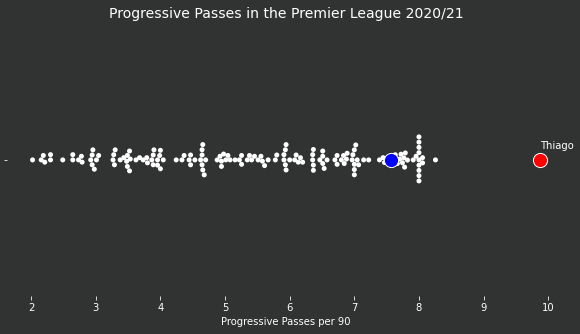

In [142]:
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

sns.swarmplot(x='90s',data=df,color='white',zorder=1)

#plot thiago
plt.scatter(x=9.87,y=0,c='red',edgecolor='white',s=200,zorder=2)
plt.text(s='Thiago',x=9.87,y=-.04,c=text_color)

#plot de bruyne
plt.scatter(x=7.564,y=0,c='blue',edgecolor='white',s=200,zorder=2)

plt.title('Progressive Passes in the Premier League 2020/21',c=text_color,fontsize=14)

plt.xlabel('Progressive Passes per 90',c=text_color)

In [143]:
#import our next dataframe
df2 = pd.read_excel('player.xls')
df2.head(10)

,Name Id,Name,Player Team Name,Player position,Nationality,Matches,Minutes,Goals,Own Goals,Assists,...,Def Defensive Midfield,Def Defensive Third,Pass Into Opposition Box,Avg Pass Length,Avg Good Pass Length,Avg Passes Shot,Avg Passes Goal,Aerial Clearance,Possession Lost,Total Aerial Duel
0,27564,Greg Alexander James Stewart,JFC,Forward,Scotland,8,632,5,0,4,...,4.0,11.0,39.0,20.0,20.0,2,1,2,54,8
1,39013,Hugo Adnan Boumous,ATKMB,Forward,France,8,606,5,0,2,...,7.0,6.0,33.0,20.0,19.0,2,2,0,50,0
2,32054,Ahmed Jahouh,MCFC,Midfielder,Morocco,8,716,1,0,5,...,20.0,33.0,29.0,24.0,23.0,5,0,6,29,13
3,11386,Alberto Noguera Ripoll,FCG,Midfielder,Spain,8,699,2,0,1,...,12.0,11.0,39.0,17.0,16.0,2,1,1,66,1
4,46791,Adrian Nicolas Luna Retamar,KBFC,Midfielder,Uruguay,8,687,1,0,3,...,13.0,10.0,33.0,21.0,19.0,0,0,0,39,9
5,17556,Jorge Ortiz Mendoza,FCG,Forward,Spain,6,439,2,0,3,...,1.0,3.0,22.0,16.0,16.0,5,0,0,60,2
6,30192,Cleiton Augusto Oliveira Silva,BFC,Forward,Brazil,8,628,4,0,2,...,3.0,5.0,26.0,19.0,19.0,2,0,3,42,10
7,156579,Mathias Coureur,NEUFC,Forward,France,9,743,1,0,2,...,4.0,2.0,18.0,17.0,15.0,2,0,4,41,19
8,35315,Suhair Vadakkepeedika,NEUFC,Forward,India,9,704,3,0,1,...,8.0,24.0,12.0,17.0,17.0,3,2,0,55,13
9,7322,Vlagyimir Koman,CFC,Midfielder,Hungary,7,586,2,0,0,...,10.0,14.0,28.0,21.0,20.0,1,0,3,23,6


In [144]:
df2['90s'] = df2['Minutes']/90
df2

,Name Id,Name,Player Team Name,Player position,Nationality,Matches,Minutes,Goals,Own Goals,Assists,...,Def Defensive Third,Pass Into Opposition Box,Avg Pass Length,Avg Good Pass Length,Avg Passes Shot,Avg Passes Goal,Aerial Clearance,Possession Lost,Total Aerial Duel,90s
0,27564,Greg Alexander James Stewart,JFC,Forward,Scotland,8,632,5,0,4,...,11.0,39.0,20.0,20.0,2,1,2,54,8,7.022222
1,39013,Hugo Adnan Boumous,ATKMB,Forward,France,8,606,5,0,2,...,6.0,33.0,20.0,19.0,2,2,0,50,0,6.733333
2,32054,Ahmed Jahouh,MCFC,Midfielder,Morocco,8,716,1,0,5,...,33.0,29.0,24.0,23.0,5,0,6,29,13,7.955556
3,11386,Alberto Noguera Ripoll,FCG,Midfielder,Spain,8,699,2,0,1,...,11.0,39.0,17.0,16.0,2,1,1,66,1,7.766667
4,46791,Adrian Nicolas Luna Retamar,KBFC,Midfielder,Uruguay,8,687,1,0,3,...,10.0,33.0,21.0,19.0,0,0,0,39,9,7.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,156065,Kiyan Nassiri Giri,ATKMB,Forward,India,1,2,0,0,0,...,0.0,0.0,NaN,NaN,0,0,0,2,0,0.022222
235,156066,Abhishek Dhananjay Suryavanshi,ATKMB,Midfielder,India,1,23,0,0,0,...,2.0,0.0,18.0,24.0,0,0,0,3,0,0.255556
236,156379,Daniel Gomes,SCEB,Defender,India,2,58,0,0,0,...,6.0,0.0,20.0,17.0,0,0,0,1,1,0.644444
237,157113,Deven Sawhney,OFC,Defender,India,1,25,0,0,0,...,2.0,0.0,19.0,20.0,0,0,0,1,0,0.277778


In [145]:
#filter data with 90s > 2 and Player position is not Goalkeeper
df2 = df2[df2['90s']>=2].reset_index()
df2 = df2[df2['Player position'] != 'Goalkeeper']


In [146]:
#create new columns for goals per 90s, assists per 90s, passes per 90s, and saves per 90s, shots per 90s, shot on goal per 90s, , forward pass per 90s, Tackles per 90s, and interceptions per 90s, clearance per 90s, Attacking Third Touches per 90s, aerial duels won per 90s,
df2['Goals p90'] = df2['Goals']/df2['90s']
df2['Assists p90'] = df2['Assists']/df2['90s']
df2['Shots p90'] = df2['Shots']/df2['90s']
df2['Shot On Target p90'] = df2['Shot On Target']/df2['90s']


df2['Tackles p90'] = df2['Tackles']/df2['90s']
df2['Interceptions p90'] = df2['Interception']/df2['90s']
df2['Clearances p90'] = df2['Clearance']/df2['90s']
df2['Aerial Duels Won p90'] = df2['Aerial Duel Won']/df2['90s']


df2['Crosses p90'] = df['Crosses']/df2['90s']
df2['Attacking Third Touches p90'] = df2['Attacking Third Touches']/df2['90s']
df2['Passes in Attacking Third p90'] = df2['Good Pass Attack Third']/df2['90s']
df2['Forward Passes p90'] = df2['Forward Passes']/df2['90s']




In [147]:
print(df2.head())

df2.Name.unique()

   index  Name Id                          Name Player Team Name  \
0      0    27564  Greg Alexander James Stewart              JFC   
1      1    39013            Hugo Adnan Boumous            ATKMB   
2      2    32054                  Ahmed Jahouh             MCFC   
3      3    11386        Alberto Noguera Ripoll              FCG   
4      4    46791   Adrian Nicolas Luna Retamar             KBFC   

  Player position Nationality  Matches  Minutes  Goals  Own Goals  ...  \
0         Forward    Scotland        8      632      5          0  ...   
1         Forward      France        8      606      5          0  ...   
2      Midfielder     Morocco        8      716      1          0  ...   
3      Midfielder       Spain        8      699      2          0  ...   
4      Midfielder     Uruguay        8      687      1          0  ...   

   Shots p90  Shot On Target p90  Tackles p90  Interceptions p90  \
0   3.132911            1.566456     2.278481           0.996835   
1   1.7821

array(['Greg Alexander James Stewart', 'Hugo Adnan Boumous',
       'Ahmed Jahouh', 'Alberto Noguera Ripoll',
       'Adrian Nicolas Luna Retamar', 'Jorge Ortiz Mendoza',
       'Cleiton Augusto Oliveira Silva', 'Mathias Coureur',
       'Suhair Vadakkepeedika', 'Vlagyimir Koman', 'Roshan Singh Naorem',
       'Khassa Camara', 'Imran Khan', 'Cassio Gabriel Vilela Ferreira',
       'Mirlan Abdraimovich Murzaev', 'Jonathas Cristian de Jesus',
       'Antonio Perosevic', 'Boris Singh Thangjam', 'Amir Dervisevic',
       'Roy Krishna', 'Igor Angulo Alboniga',
       'Francisco Javier Hernandez Gonzalez', 'Bipin Singh Thounaojam',
       'Lallianzuala Chhangte', 'Akash Mishra',
       'Bartholomew Owogbalor Ogbeche', 'Jerry Mawihmingthanga',
       'Joni Ensio Kauko', 'Jorge Rolando Pereyra Diaz',
       'Ygor de Oliveira Ferreira', 'Joao Victor de Albuquerque Bruno',
       'Eduardo Garcia Martin', 'Alexandre Monteiro de Lima',
       'Mohammad Rafique', 'Anirudh Thapa', 'Sunil Chhetri',
 

In [148]:
#create a list of 6 metrics to compare
metrics = ['Goals p90', 'Assists p90', 'Shots p90', 'Shot On Target p90', 'Attacking Third Touches p90', 'Passes in Attacking Third p90']

In [149]:
#get data fo a particular player for the above metrics
df2[df2['Name']=='Greg Alexander James Stewart']



,index,Name Id,Name,Player Team Name,Player position,Nationality,Matches,Minutes,Goals,Own Goals,...,Shots p90,Shot On Target p90,Tackles p90,Interceptions p90,Clearances p90,Aerial Duels Won p90,Crosses p90,Attacking Third Touches p90,Passes in Attacking Third p90,Forward Passes p90
0,0,27564,Greg Alexander James Stewart,JFC,Forward,Scotland,8,632,5,0,...,3.132911,1.566456,2.278481,0.996835,0.56962,0.56962,3.275316,35.458861,14.240506,13.243671


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


TypeError: missing a required argument: 'y'

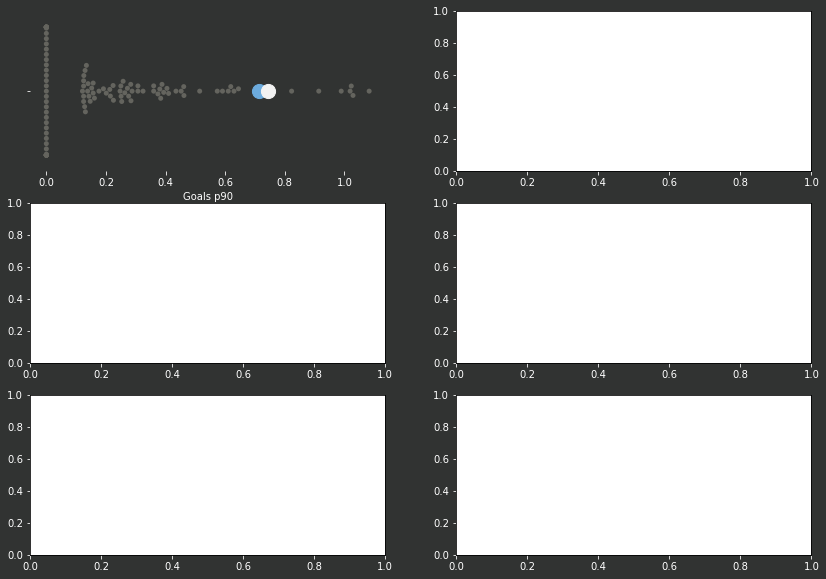

In [150]:
fig,axes = plt.subplots(3,2,figsize=(14,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#create a list of comparisons
counter=0
counter2=0
met_counter = 0

for i,ax in zip(df2['Name'],axes.flatten()):
    ax.set_facecolor(background)
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
    
    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)
            
    sns.swarmplot(x=metrics[met_counter],data=df2,ax=axes[counter,counter2],zorder=1,color='#64645e')
    ax.set_xlabel(f'{metrics[met_counter]}',c='white')
    
    for x in range(len(df2['Name'])):
        if df2['Name'][x] == 'Greg Alexander James Stewart':
            ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='#6CABDD',zorder=2)
        if df2['Name'][x] == 'Hugo Adnan Boumous':
            ax.scatter(ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='#F2F2F2',zorder=2))
                        
    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue
    if counter2 == 1:
        counter2 = 0
        counter+=1
        
#Highlight the player we are comparing and title name as <Name>'s ISL stats 
